# nerd_sniping

A finite difference solution to the infinite resistor grid problem shown in XKCD comic 356.

In [1]:
from functions import nerd_snipe
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16

## The simulated and analytic values of resistance

There is a surprising analytic solution for the resistance $R = 4/\pi - 1/2$. We compare the finite difference solution to this value, for a given grid size. 

4 4
6 5
Rsim = 0.7453 Ohms
Ran = 0.7732 Ohms


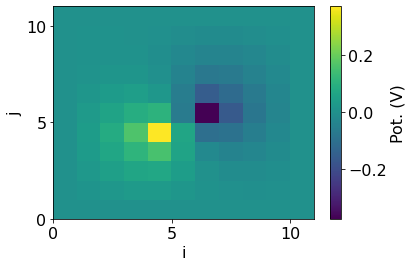

In [2]:
# the grid size
nx,ny = 11,11

# the locations of the source and sink
bx,by = nx//2-1,ny//2-1
cx,cy = nx//2+1,ny//2

print(bx,by)
print(cx,cy)

# works out the resulting potential
V = nerd_snipe(nx,ny,bx,by,cx,cy)

# the resistance from the calculated potential
Rsim = -V[cx,cy]+V[bx,by]
print('Rsim = {:0.4f} Ohms'.format(Rsim))

# the analytic resistance
Ran = 4/np.pi - 0.5
print('Ran = {:0.4f} Ohms'.format(Ran))


# plot the potential
fig,ax = plt.subplots(1,1,figsize=[6,4])
plot = ax.pcolor(V.T)
cbar = fig.colorbar(plot)
cbar.set_label('Pot. (V)')

ax.set_xticks([0,5,10])
ax.set_yticks([0,5,10])
ax.set_xlabel('i');
ax.set_ylabel('j');

fig.tight_layout()
fig.savefig('pot.png',facecolor=None,dpi=300)

## Convergence to the analytic value

Surely a larger grid will give a more accurate value for the resistance. Here we take a look and study the convergence. 

In [3]:
# the grid sizes
sizes =  [[11,11],[21,21],[41,41],[81,81],[161,161],[321,321]]

# populate a list of resistances for each grid size
resistances = []

for size in sizes:
    nx,ny = size
    bx,by = nx//2-1,ny//2
    cx,cy = nx//2+1,ny//2+1
    V = nerd_snipe(nx,ny,bx,by,cx,cy)
    Rsim = -V[cx,cy]+V[bx,by]
    resistances.append(Rsim)

## Plotting on a lin-log scale

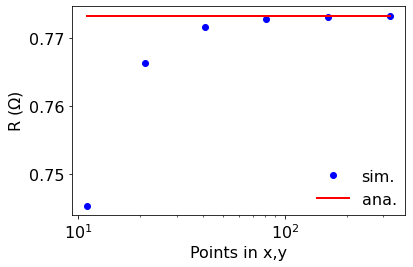

In [4]:
fig,ax = plt.subplots(1,1,figsize=[6,4])
x_vals = [size[0] for size in sizes]
ax.semilogx(x_vals,resistances,'.',markersize=12,color='b',label='sim.')
ax.set_ylabel('R ($\Omega$)')
ax.set_xlabel('Points in x,y')
ax.semilogx([11,321],[Ran,Ran],linewidth=2,color='r',label='ana.')
fig.legend(frameon=False,loc = [0.75,0.2])
fig.tight_layout()
fig.savefig('R_lin_log.png',facecolor=None,dpi=300)

## Plotting on a log-log scale

Fits with a power of 2.16


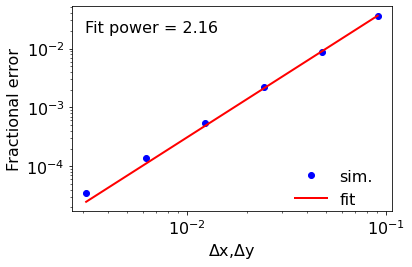

In [5]:
def power(x,a,b):
    return a*x**b
dx_vals = [1/x for x in x_vals]

resistance_delta = [(Ran - resistance)/Ran for resistance in resistances]
popt,pcov = curve_fit(power,dx_vals,resistance_delta)
print('Fits with a power of {:0.2f}'.format(popt[1]))

fig,ax = plt.subplots(1,1,figsize=[6,4])

ax.loglog(dx_vals,resistance_delta,'.',markersize=12,color='b',label = 'sim.')
ax.loglog(dx_vals,power(np.array(dx_vals),*popt),linewidth=2,color='r',label='fit')
ax.set_ylabel('Fractional error')
ax.set_xlabel('$\Delta$x,$\Delta$y')
fig.legend(frameon=False,loc = [0.7,0.2])
fig.tight_layout()
fig.text(0.22,0.85,'Fit power = {:0.2f}'.format(popt[1]))
fig.savefig('dR_log_log.png',facecolor=None,dpi=300)